In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
from matplotlib import image
from numpy import asarray
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt


In [ ]:
x_image_list = []
y_image_list = []
dir_paths = [
'/content/drive/My Drive/Im_P_IDP_red_1/n02110806-basenji/',
'/content/drive/My Drive/Im_P_IDP_red_1/n02107683-Bernese_mountain_dog/',
'/content/drive/My Drive/Im_P_IDP_red_1/n02092002-Scottish_deerhound/',
]
print(dir_paths)

['/content/drive/My Drive/Im_P_IDP_red_1/n02110806-basenji/', '/content/drive/My Drive/Im_P_IDP_red_1/n02107683-Bernese_mountain_dog/', '/content/drive/My Drive/Im_P_IDP_red_1/n02092002-Scottish_deerhound/']


In [ ]:
x = dir_paths
classif = 0
for tup in x:
    cont = 0
    classif += 1
    for filename in glob.glob( tup + '*.jpg'):
        cont+=1
        im=Image.open(filename)
        img= im.copy()
        x_image_list.append(img)
        y_image_list.append(classif-1)
        im.close()
    print(classif)



1
2
3


In [ ]:
print(x_image_list)

[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F6281F1BE10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F6281F1BF90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F6281F1BF50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D9D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D8D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D550>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87DD90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D290>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D610>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D590>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D450>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87DE50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D6D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D350>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F620D87D0D0>, <PIL.Image.Image image m

In [ ]:
# Cambia orden del conjunto
df = pd.DataFrame({'Images': x_image_list, 'Class': y_image_list})

np.random.seed(1)

df = df.sample(frac=1)




# Separamos los conjuntos en los conjuntos de *train* y *test*

test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]



In [ ]:
lst=[]

for img in df_train.values[:,:-1]:
    img = img[0]
    rgb = np.array(img)
    lst.append(rgb)
train_x=np.array(lst)
print(type(train_x))
print(train_x.shape)

lst1=[]

for img in df_test.values[:,:-1]:
    img = img[0]
    rgb = np.array(img)
    lst1.append(rgb)
test_x=np.array(lst1)
print(type(test_x))
print(test_x.shape)

<class 'numpy.ndarray'>
(593, 224, 224, 3)
<class 'numpy.ndarray'>
(66, 224, 224, 3)


In [ ]:
train_y = df_train.values[:,-1:]
test_y = df_test.values[:,-1:]

In [ ]:
train_y[0]

array([2], dtype=object)

In [ ]:
train_x.shape

(593, 150528)

In [ ]:
train_x[1]

array([[[ 64,  71,  89],
        [ 64,  71,  87],
        [ 66,  74,  85],
        ...,
        [ 68,  48,  49],
        [ 72,  54,  54],
        [ 71,  53,  53]],

       [[ 65,  72,  88],
        [ 69,  77,  90],
        [ 66,  72,  86],
        ...,
        [ 68,  48,  49],
        [ 70,  50,  51],
        [ 72,  52,  53]],

       [[ 67,  75,  88],
        [ 68,  74,  86],
        [ 67,  74,  84],
        ...,
        [ 65,  45,  44],
        [ 65,  44,  43],
        [ 68,  47,  46]],

       ...,

       [[ 77,  47,  37],
        [ 71,  49,  36],
        [ 62,  46,  31],
        ...,
        [156, 116,  90],
        [153, 116,  87],
        [163, 128,  98]],

       [[ 73,  45,  34],
        [ 66,  47,  32],
        [ 59,  41,  27],
        ...,
        [148, 109,  80],
        [160, 124,  92],
        [162, 126,  94]],

       [[ 69,  42,  31],
        [ 61,  43,  29],
        [ 59,  46,  30],
        ...,
        [149, 110,  79],
        [158, 122,  90],
        [164, 128,  96]]

In [ ]:
train_x = np.reshape(train_x, (593, 150528)) / 255
test_x = np.reshape(test_x, (66, 150528)) / 255

In [ ]:
train_y = np.squeeze(train_y)
test_y = np.squeeze(test_y)

In [ ]:
print(test_y)

[1 0 2 0 1 1 1 0 0 1 2 1 0 0 0 0 2 1 1 0 2 0 2 2 2 2 2 1 0 2 2 2 1 1 1 2 1
 2 1 0 1 0 0 2 2 1 2 2 1 2 1 2 1 1 1 0 1 1 2 2 0 0 2 0 1 0]


In [ ]:
t_y = []

for i in train_y:
  
  if i == 0:
    b = [1.,0.,0.]
    a = np.array(b)
    t_y.append(a)
  if i == 1:
    b = [0.,1.,0.]
    a = np.array(b) 
    t_y.append(a)
  if i == 2:
    b = [0.,0.,1.]
    a = np.array(b)
    t_y.append(a)

te_y = []

for i in test_y:
  
  if i == 0:
    b_ = [1.,0.,0.]
    a_ = np.array(b_)
    te_y.append(a_)
  if i == 1:
    b_ = [0.,1.,0.]
    a_ = np.array(b_) 
    te_y.append(a_)
  if i == 2:
    b_ = [0.,0.,1.]
    a_ = np.array(b_)
    te_y.append(a_)

In [ ]:
train_y = np.array(t_y)
test_y = np.array(te_y)

In [ ]:
train_y[0]

array([0., 0., 1.])

In [ ]:
#train_y = np.array([np.eye(3)[train_y[i]] for i in train_y])
#test_y = np.array([np.eye(3)[test_y[i]] for i in test_y])

In [ ]:
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))

print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

train_x shape: (593, 150528)
train_y shape: (593, 3)
test_x shape: (66, 150528)
test_y shape: (66, 3)


The image label is: [1. 0. 0.]


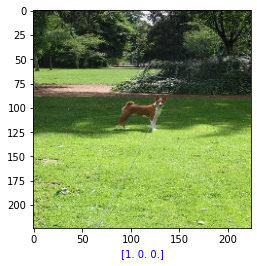

In [ ]:
index = 55
img = plt.imshow(np.reshape(train_x, (593 ,224, 224,3))[index])
plt.xlabel(str(train_y[index]), color="b")
print('The image label is:', train_y[index])

In [ ]:
class NeuralNetwork:

    ''' Clase Neural Network
        se declaran los parametros de weight y bias
        y sus respectivas derivadas
    '''

    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
       
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], 1)))


class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):

        ''' Feed forward Neural Network (propagación hacia adelante)
            Nos regresa el output de cada "neurona"
        '''
        out = [(None, X)]### Para realizar el Backward.
        A = tf.convert_to_tensor(X, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu6(Z) #FUNCION DE ACTIVACIÓN
            else:
                A = Z
            out.append((Z, A)) # Para el back
        return A  ## Este return debe ir después 


        #l_2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
         #   lambda Yp, Yr: (Yp - Yr))
        #if forward_pass: ##
          #deltas = []##

          #for l in reversed(range(0, len(self.L))):##
                 # z = out[l+1][0] ##
                  #a = out[l+1][1]##


          #if l == len(self.L) - 1:
          #Calcular delta última capa
          #deltas.insert(0, l_2_cost[1](a, Y) * neural_net[l].act_f[1](a))  ## esta es a parte importante

          #else:
            #Calcular delta respecto a capa previa

          #deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a)) # Con esta
          #_w = neural_net[l].w

        #return out[-1][1]
class NeuralNetwork(NeuralNetwork):

    ''' Función que calcula la salida en el caso de multiples clases.
        La función de update_params actualiza los valores de los weight y bias, 
        para cada capa y neurona usando el método de gradient descent.
    '''

    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A) #Computes softmax cross entropy between logits and labels.
        return tf.reduce_mean(loss)
    
    
    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])


class NeuralNetwork(NeuralNetwork):

    ''' La función predict predice los valores esperados.
        La función info nos da la información general sobre
        el modelo, como la cantidad de parámetros totales,
        las capas internas y otros.
    '''

    def predict(self, X):

        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)


class NeuralNetwork(NeuralNetwork):
    def train_on_batch(self, X, Y, lr):
         
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)
          
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy()


class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):

        history = {
            'val_loss':[],
            'train_loss':[],
            'val_acc':[]
        }
        
        for e in range(1, epochs+1):
            epoch_train_loss = 0
            print('Epoch{}'.format(e), end='.')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss
                
                if i%int(steps_per_epoch/10) == 0:
                    print(end='.')
            l_2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
            lambda Yp, Yr: (Yp - Yr))        
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            val_acc = np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
            history['val_acc'].append(val_acc)
            print(' Val acc:',val_acc, "Val error", val_loss)
        return history



In [ ]:
net = NeuralNetwork([150528,192,96,48,24, 12 ,3])
net.info()

NameError: ignored

In [ ]:
batch_size = 10
epochs = 20
steps_per_epoch = int(train_x.shape[0]/batch_size)
lr = 0.005
print('S0teps per epoch', steps_per_epoch)

In [ ]:
history = net.train(train_x, train_y, test_x, test_y, epochs, steps_per_epoch, batch_size, lr)

NameError: ignored

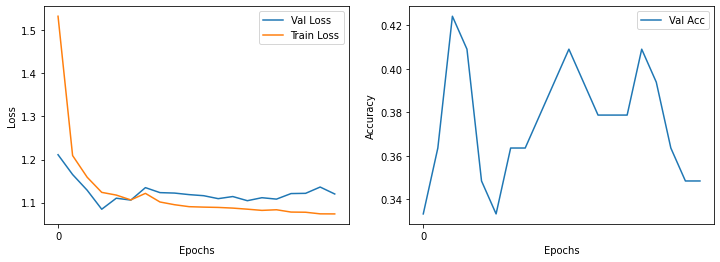

In [ ]:
                                                                                                                        plt.figure(figsize=(12, 4))
epochs = len(history['val_loss'])
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history['val_loss'], label='Val Loss')
plt.plot(range(epochs), history['train_loss'], label='Train Loss')
plt.xticks(list(range(0, epochs, 20)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history['val_acc'], label='Val Acc')
plt.xticks(list(range(0, epochs, 20)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
preds = net.predict(test_x)

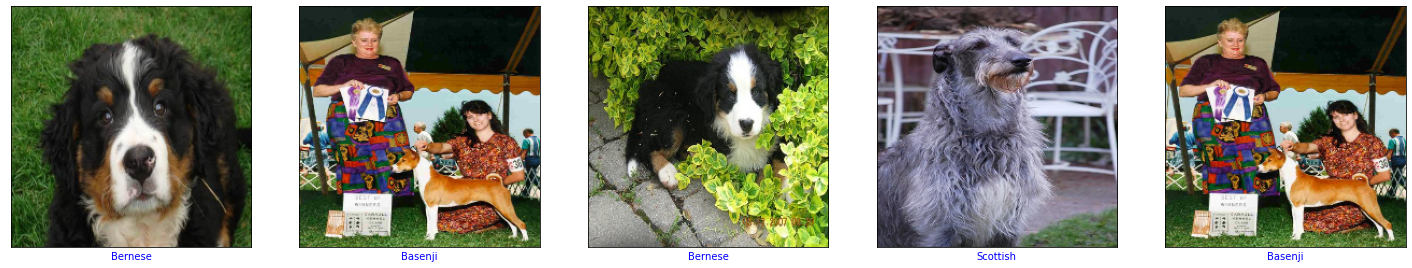

In [ ]:
classif_1 = ["Basenji", "Bernese", "Scottish"]
indices = np.random.choice(range(0, test_x.shape[0]), 5)
y = np.argmax(test_y, axis=1)
p=preds.numpy()
plt.figure(figsize=(25, 20))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_x[index].reshape((224, 224, 3)))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classif_1[y[index]], color='blue')

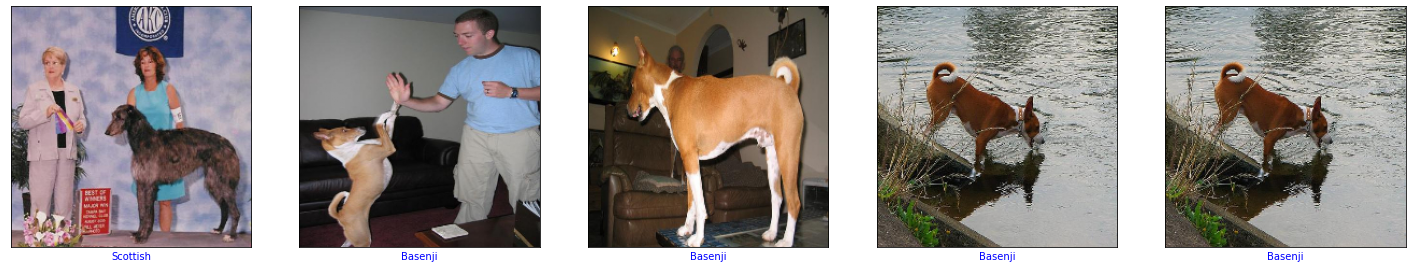

In [ ]:
classif_1 = ["Basenji", "Bernese", "Scottish"]
indices = np.random.choice(range(0, test_x.shape[0]), 5)
y = np.argmax(test_y, axis=1)
p=preds.numpy()
plt.figure(figsize=(25, 20))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_x[index].reshape((224, 224, 3)))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classif_1[y[index]], color='blue')

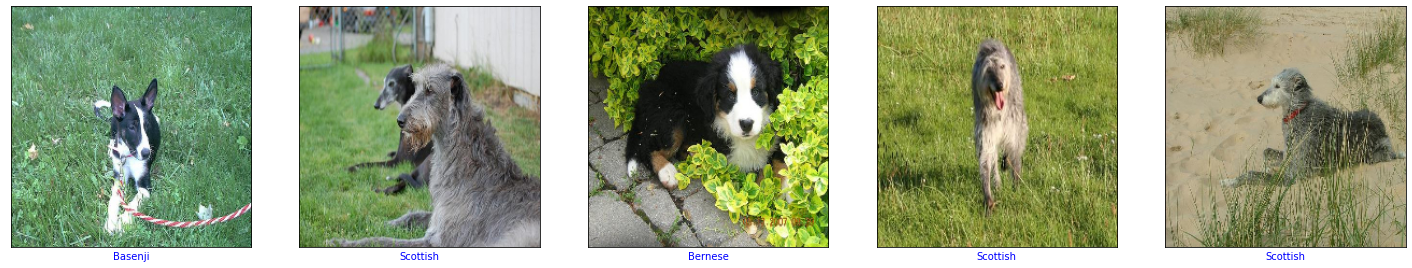

In [ ]:
classif_1 = ["Basenji", "Bernese", "Scottish"]
indices = np.random.choice(range(0, test_x.shape[0]), 5)
y = np.argmax(test_y, axis=1)
p=preds.numpy()
plt.figure(figsize=(25, 20))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_x[index].reshape((224, 224, 3)))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classif_1[y[index]], color='blue')

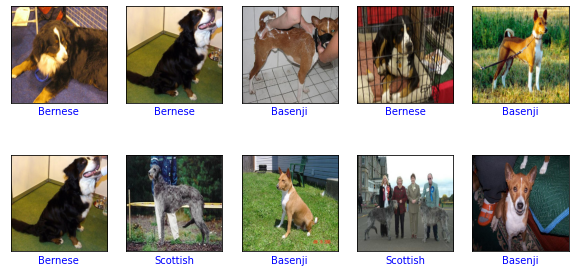

In [ ]:
classif_1 = ["Basenji", "Bernese", "Scottish"]
indices = np.random.choice(range(0, test_x.shape[0]), 10)
y = np.argmax(test_y, axis=1)
p=preds.numpy()
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_x[index].reshape((224, 224, 3)))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classif_1[y[index]], color='blue')

In [ ]:
l_2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
            lambda Yp, Yr: (Yp - Yr))

In [ ]:
aaaa = np.linspace(0,100,1)
aaa = np.linspace(0,100,1)

In [ ]:
l_2_cost[aaaa, aaa]

TypeError: ignored